# Barnes-Hut Method for N-body Simulation
## Initial Tests to Verify Implementation


In [1]:

%load_ext autoreload
%autoreload 2
import numpy as np
from modules.Particle import Particle
from modules.BH_Classes import BH
from modules.Analytic_Classes import SingleParticle
import copy
import modules.Utility as util
import matplotlib.pyplot as plt
from modules.Direct_Classes import Direct

### Single Massive Particle Simulation

In [2]:
n_particles = 5000
max_mass = 1E-100
box_size = 1000
theta=1
initial_positions = np.random.random((n_particles,3)) * box_size
initial_particles = []
print(len(initial_particles))
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_mass)))

single_particle_position = np.array([0.5,0.5,0.5])*box_size
single_particle_property = 1
initial_particles.append(Particle(single_particle_position, single_particle_property))

# Run Simulations
bh_particles = copy.deepcopy(initial_particles)
bh_simulation = BH(box_size, bh_particles, theta=theta)
bh_simulation.run()

analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation = SingleParticle(single_particle_position, single_particle_property, box_size)
analytic_simulation.evaluate_particle_acceleration(analytic_particles)

0


/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/BH_Classes.py:130: RuntimeWarning: divide by zero encountered in scalar divide
  elif self.size / self.system.distance(self, particle) < theta:
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Analytic_Classes.py:18: RuntimeWarning: invalid value encountered in divide
  direction = (delta_positions)/np.linalg.norm(delta_positions)
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Analytic_Classes.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  particle.acceleration = self.property / (np.linalg.norm(delta_positions) ** 2) * direction


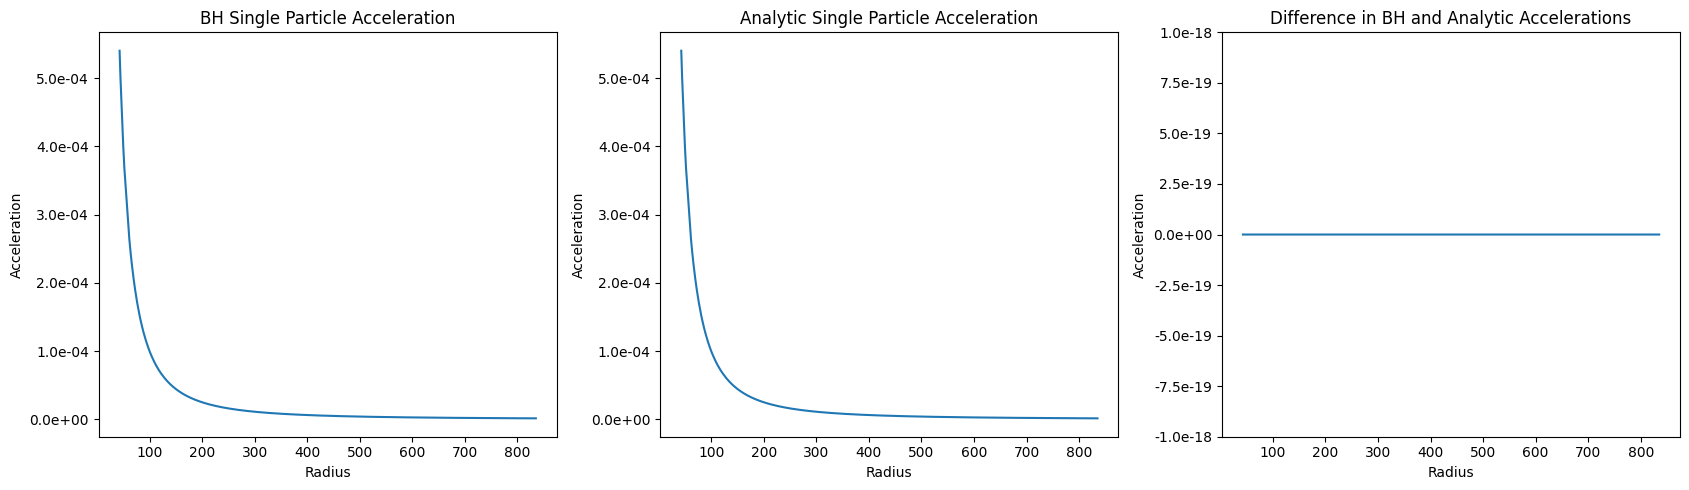

In [3]:
single_particle_fig, single_particle_axs = plt.subplots(1,3)
bh_results = util.calc_3D_results(bh_particles, single_particle_position, plotting=True, fig=single_particle_fig, ax=single_particle_axs[0], title="BH Single Particle Acceleration", x_label="Radius", y_label="Acceleration")
analytic_results = util.calc_3D_results(analytic_particles, single_particle_position, plotting=True, fig=single_particle_fig, ax=single_particle_axs[1], title="Analytic Single Particle Acceleration", x_label="Radius", y_label="Acceleration")
bh_analytic_results = util.calc_3D_difference_results(bh_particles, analytic_particles, single_particle_position, True, fig=single_particle_fig, ax=single_particle_axs[2], y_range=[-1E-18, 1E-18], title="Difference in BH and Analytic Accelerations", x_label="Radius", y_label="Acceleration")
single_particle_fig.set_size_inches(17,5)
single_particle_fig.tight_layout()


### Many Massive Particles Simulation

In [4]:
n_particles = 5000
max_mass = 1
box_size = 1000
initial_positions = np.random.random((n_particles,3)) * box_size
initial_particles = []
print(len(initial_particles))
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_mass)))
centre_position = np.ones(3)*box_size/2



direct_particles = copy.deepcopy(initial_particles)
direct_simulation = Direct(box_size, direct_particles)
direct_simulation.run_forces(plotting=False)

0
1000
2000
3000
4000
5000


In [5]:
# Run Simulations
theta=0.5
bh_many_particles = copy.deepcopy(initial_particles)
bh_many_particle_simulation = BH(box_size, bh_many_particles, theta=theta)
bh_many_particle_simulation.run()

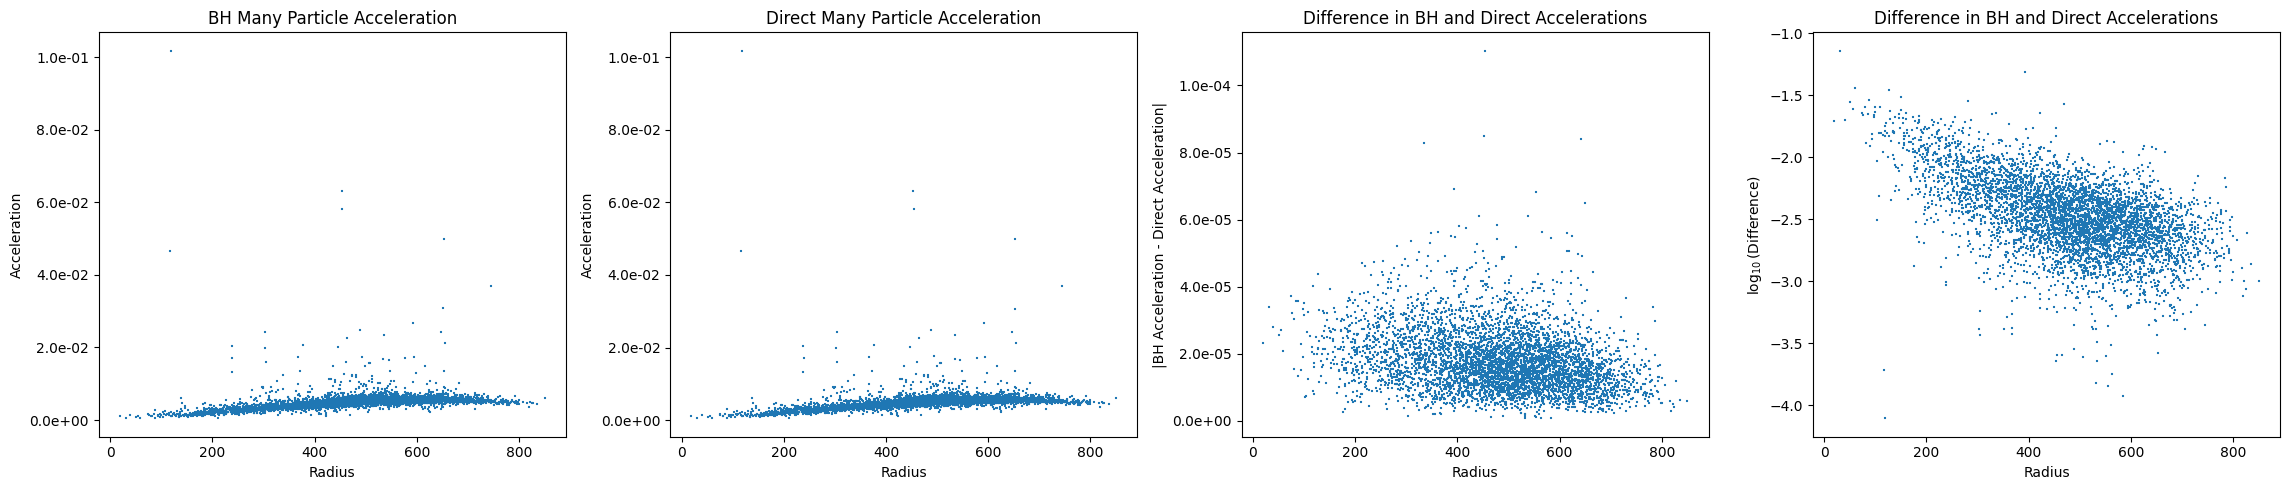

In [6]:
many_particle_fig, many_particle_axs = plt.subplots(1,4)
bh_many_results = util.calc_3D_results(bh_many_particles, centre_position, plotting=True, scatter = True, marker_size = 1, format="+", fig=many_particle_fig, ax=many_particle_axs[0], title="BH Many Particle Acceleration", x_label="Radius", y_label="Acceleration")
direct_many_results = util.calc_3D_results(direct_particles, centre_position, plotting=True, scatter = True, marker_size = 1, format="+", fig=many_particle_fig, ax=many_particle_axs[1], title="Direct Many Particle Acceleration", x_label="Radius", y_label="Acceleration")
bh_direct_results = util.calc_3D_difference_results(bh_many_particles, direct_particles, centre_position, True, scatter = True, marker_size = 1, format="+", fig=many_particle_fig, ax=many_particle_axs[2], title="Difference in BH and Direct Accelerations", x_label="Radius", y_label="|BH Acceleration - Direct Acceleration|")
log_bh_direct_results = util.calc_3D_relative_error_results(bh_many_particles, direct_particles, centre_position, True, scatter = True, marker_size = 1, format="+", fig=many_particle_fig, ax=many_particle_axs[3], title="Difference in BH and Direct Accelerations", x_label="Radius", y_label=r"$\log_{10}(\text{Difference})$")

many_particle_fig.set_size_inches(23,5)
many_particle_fig.tight_layout()

### Increasing Accuracy

10
2
1.5
1.25
1
0.9
0.7
0.5
0.3


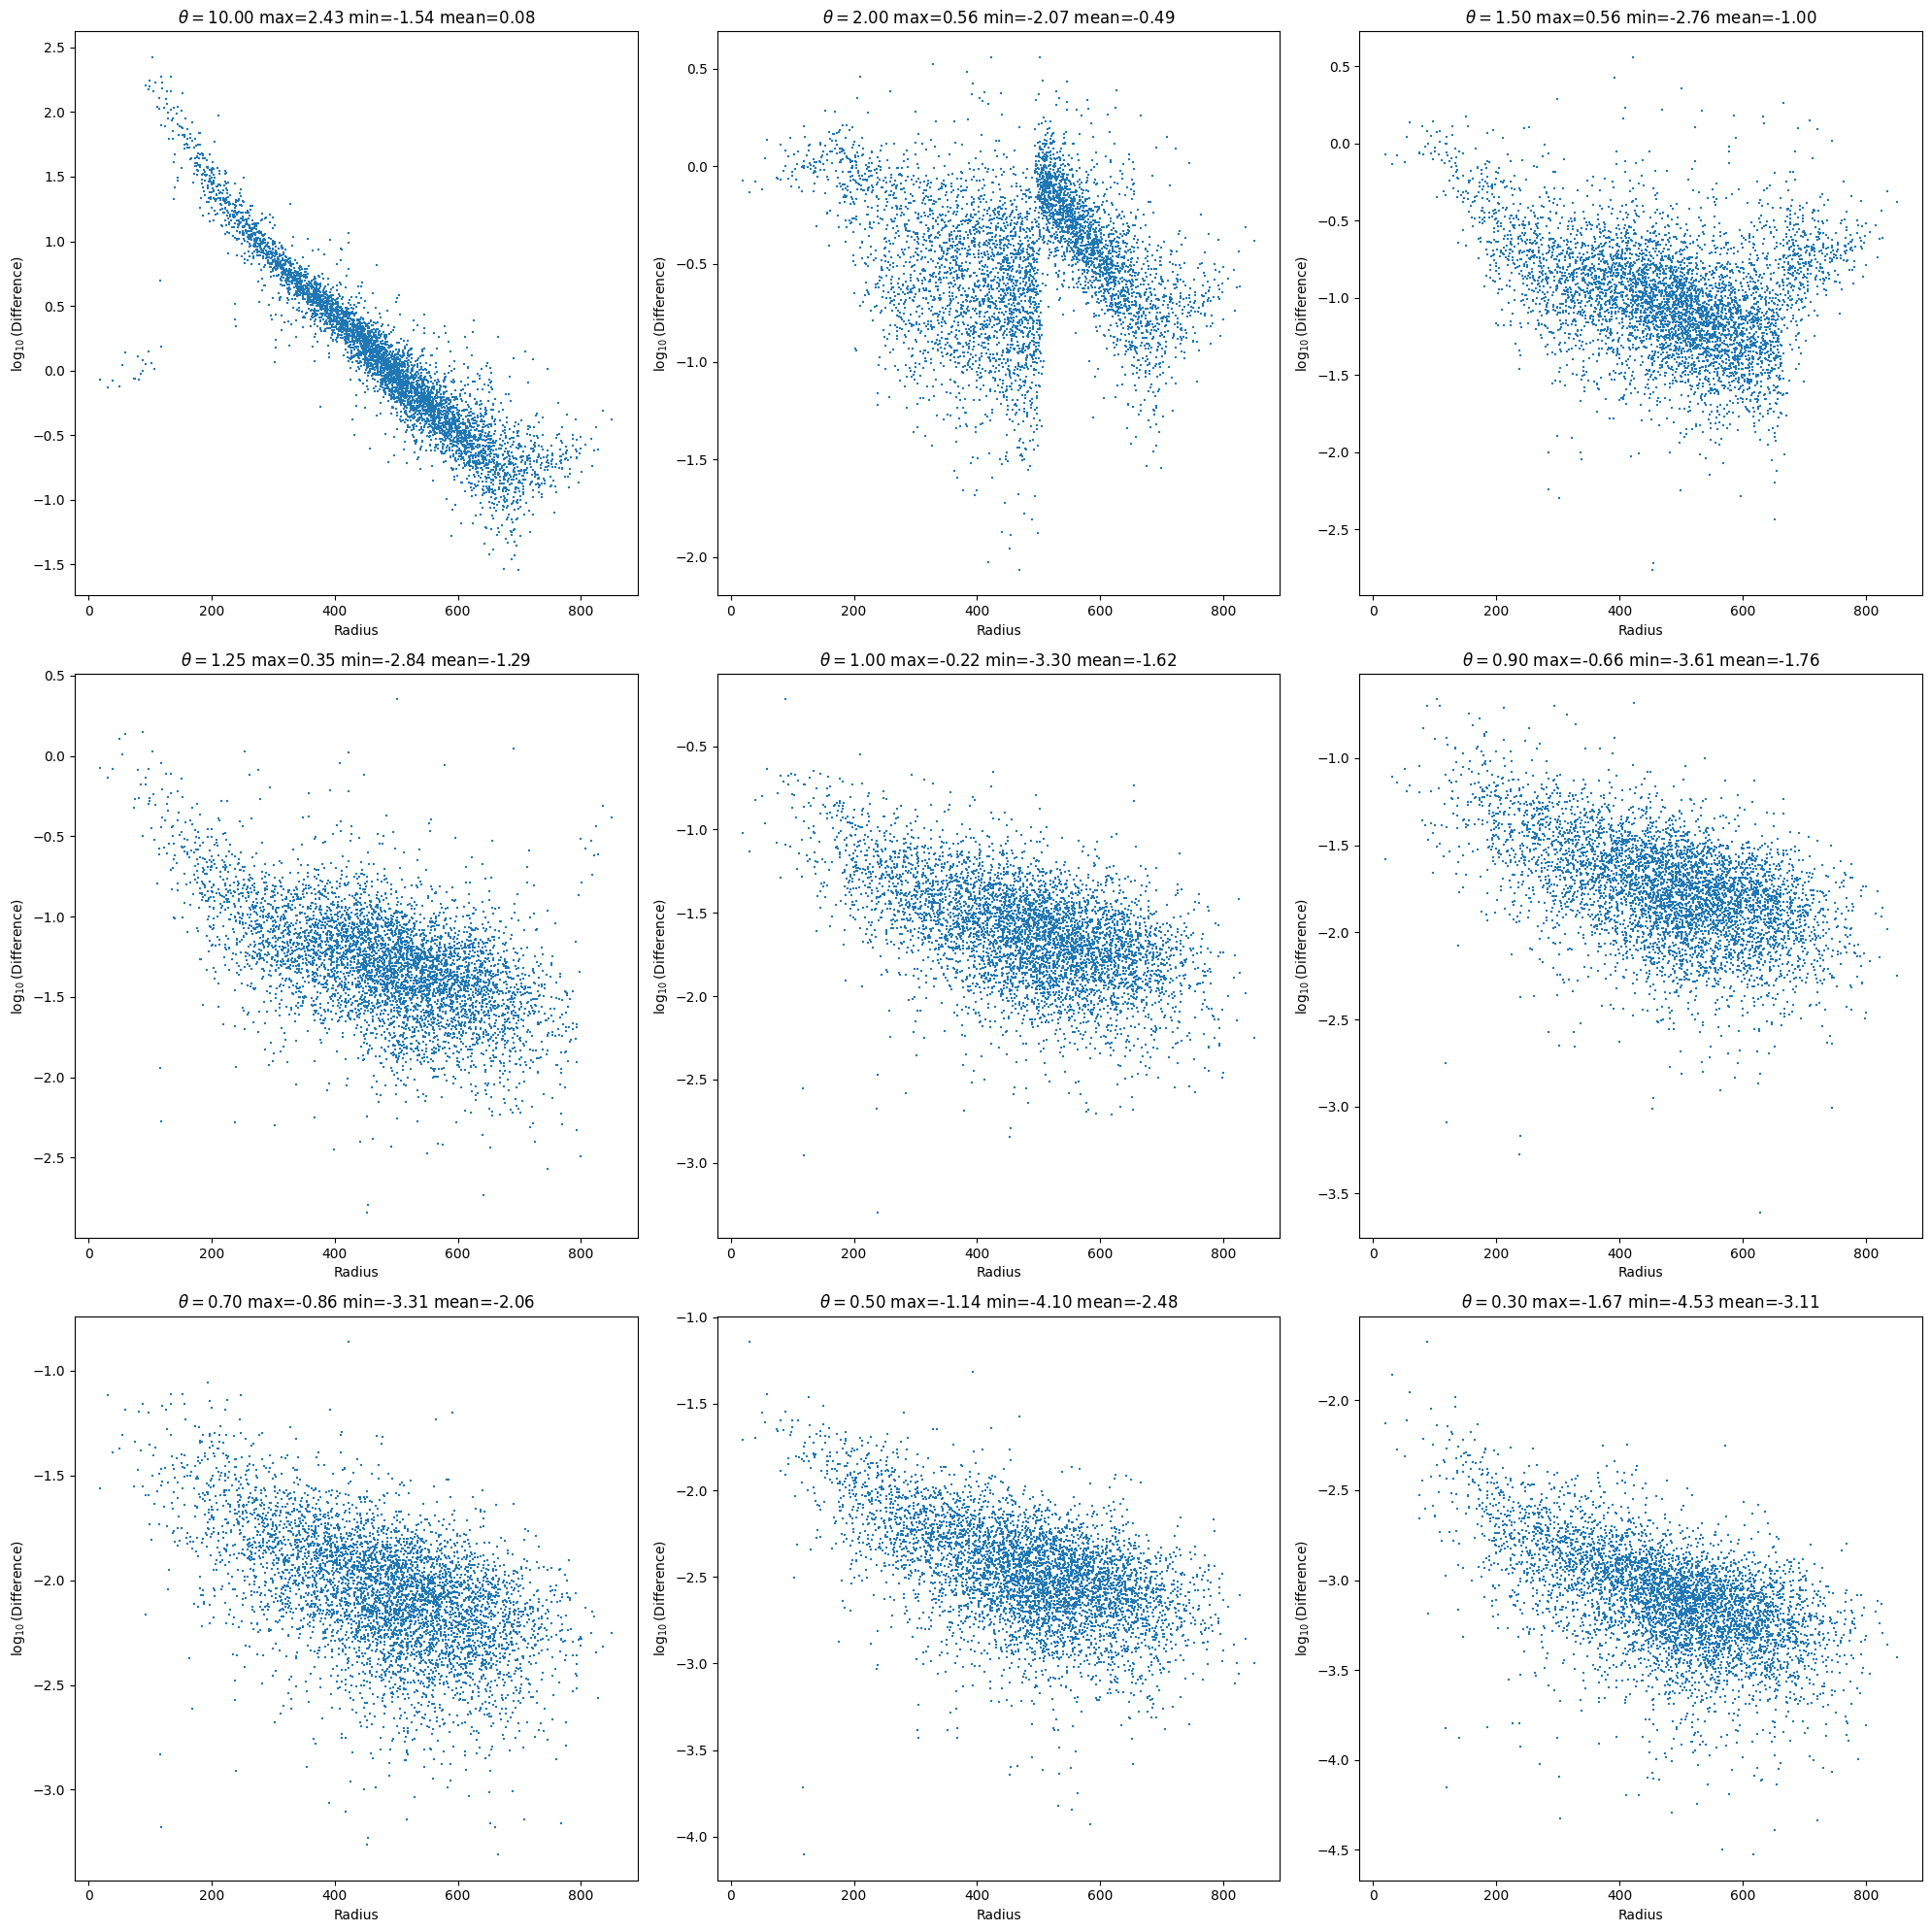

In [9]:
accuracy_fig, accuracy_axs = plt.subplots(3,3)
i = 0
for theta in [10,2,1.5,1.25,1,0.9,0.7,0.5,0.3]:
    print(theta)
    bh_accuracy_particles = copy.deepcopy(initial_particles)
    bh_accuracy_particle_simulation = BH(box_size, bh_accuracy_particles, theta=theta)
    bh_accuracy_particle_simulation.run()
    log_bh_direct_results = util.calc_3D_relative_error_results(bh_accuracy_particles, direct_particles, centre_position, True, scatter = True, marker_size = 1, format="+", fig=accuracy_fig, ax=accuracy_axs[int(i/3), i%3], x_label="Radius", y_label=r"$\log_{10}(\text{Difference})$")
    log_bh_direct_results.ax.set_title(r"$\theta=$" + '{0:.2f}'.format(theta) + " max=" + '{0:.2f}'.format(log_bh_direct_results.max) + " min=" + '{0:.2f}'.format(log_bh_direct_results.min) + " mean=" + '{0:.2f}'.format(log_bh_direct_results.mean))
    i += 1
accuracy_fig.set_size_inches(20,20)
accuracy_fig.tight_layout()
accuracy_fig
plt.show()

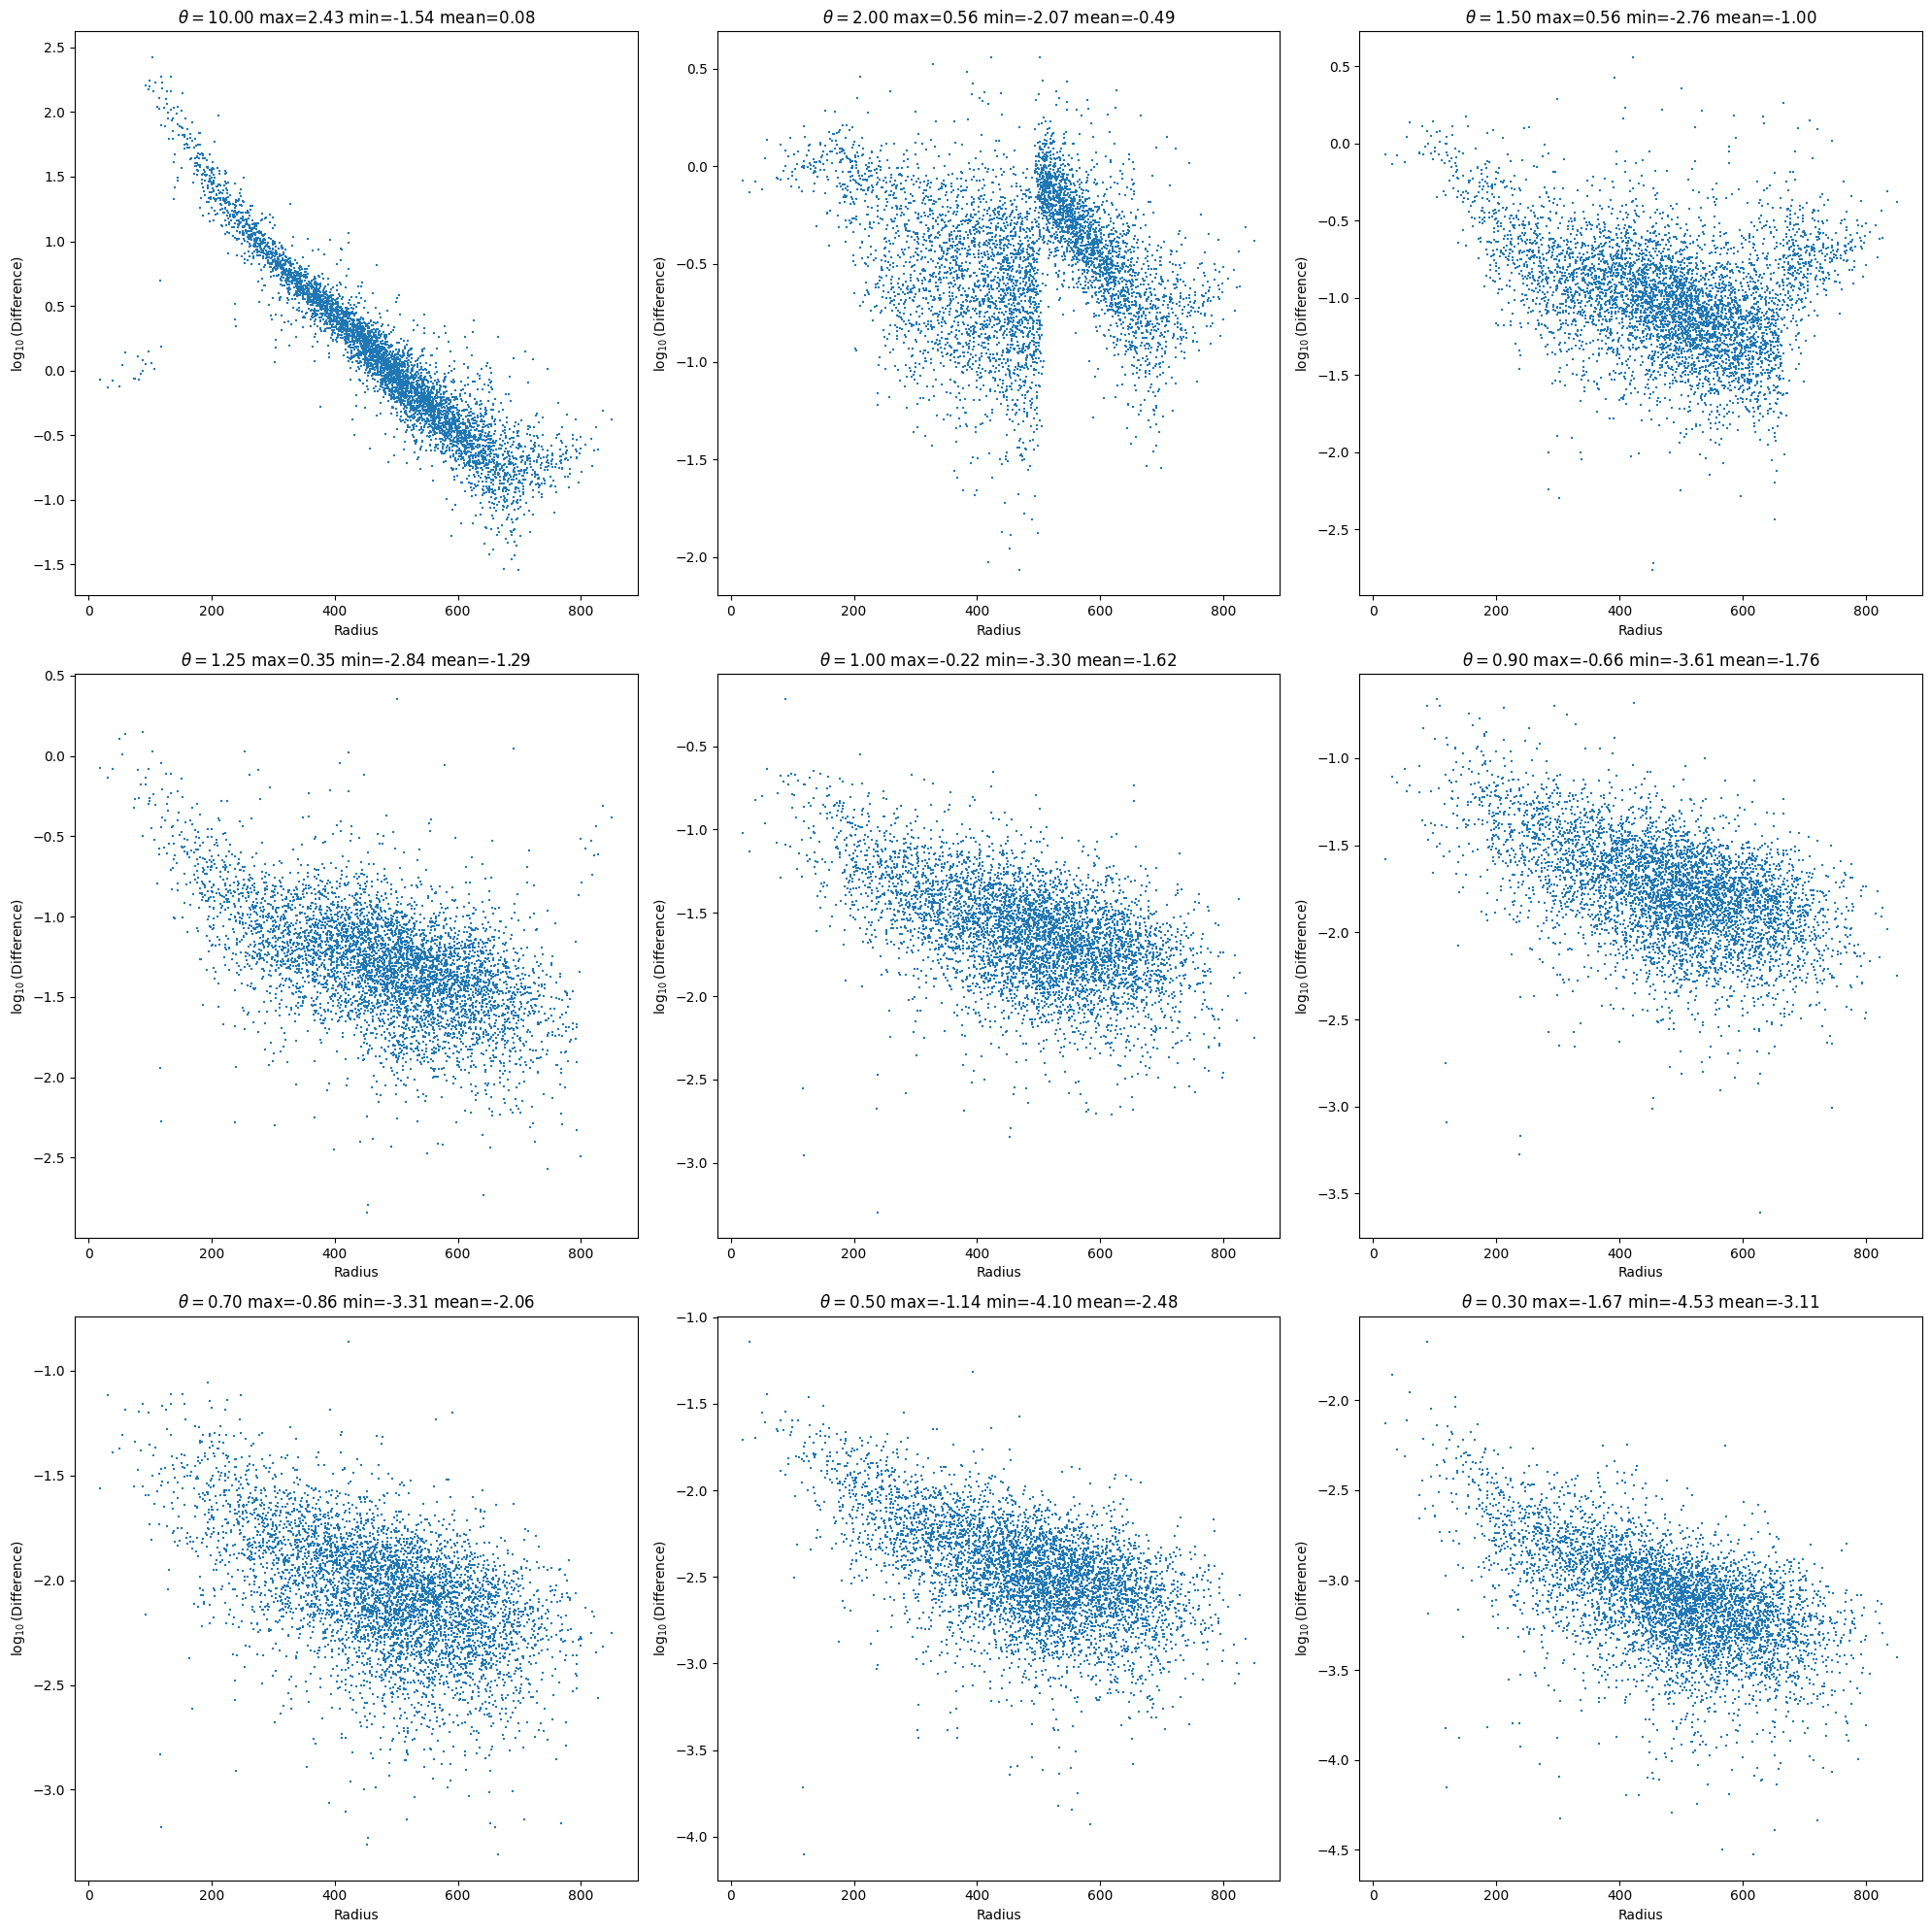

In [10]:
accuracy_fig